![Astrofisica Computacional](data/logo.PNG)

## 01. Análisis de Errores


Code by Carlos Andrés del Valle (cdelv@unal.edu.co)

Theory by Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Resumen

En este cuaderno se presentan algunos conceptos fundamentales del análisis de errores y de la estabilidad.

---

Varias fuentes de error aparecen en los calculos numéricos. Algunas de ellas son:

**Incertidumbre experimental** : Los datos experimentales están limitados por la precisión de los aparatos de medida. Por lo tanto es usual representar las cantidades experimentales con el formato $x \pm \Delta x$ donde $\Delta x$ corresponde a la incertidumbre en las mediciones.\
Cuando se utilizan cantidades o datos experimentales en algoritmos numéricos, las incertidumbres pueden llevar a errores finales grandes.

**Errores de Redondeo (Números de Punto Flotante)** : La representación computacional de un número esta siempre limitado por la memoria adjudicada a su representación. Por lo tanto, es inherente un error de redondeo en cualquier cantidad almacendad en un ordenador y este hecho puede llevar a una acumulación que finalmente desemboca en un error grande si no se controla por el algoritmo. 

**Errores de Truncamiento** : Cuando se representa una función en el computador, como por ejemplo una raiz cuadrada, una exponencial, un logaritmo, etc., utilizando expansiones en serie, el truncamiento de la serie o las iteraciones del algoritmo induce un error que puede acumularse en cada paso.

A continuación ilustraremos la existencia de estas fuentes de error con algunos ejemplos concretos.

---
### Errores de Redondeo (Números de Punto Flotante)

Primero, definiremos un número de punto flotante,

In [1]:
x = 3.1416
x

3.1416

Si se muestra en pantalla este número, con una precisión de 20 cifras decimales, se puede observar un error inducido por la representación que realiza el computador. Este error es inherente al número finito de bits que se utilizan para guardar el número de punto flotante.

In [2]:
using Printf
#println(round(x; digits=20))
@printf("esto es una string %.20f", x)

esto es una string 3.14159999999999994813

De esta forma, sumar un número pequeño a $x$ da como resultado algo inesperado: 

In [3]:
y= x + 0.0000000000000001
@printf("%.20f",y)

3.14159999999999994813

#### Epsilon de la Máquina 

La cantidad denominada **épsilon de la máquina** corresponde al valor mínimo $\epsilon$ para el cual la máquina asume que  $1. + \epsilon= 1$. Matemáticamente lo definimos diciendo que 

$\epsilon = \min \left[ \delta >0 |: 1 +\delta >1 \right]  $

Esta cantidad define la precisión de la maquina para representar números de punto flotante y para realizar cálculos con ellos.

In [4]:
ϵ = 1.

while (1.0+ϵ) != 1.
    ϵ = ϵ/2.
end

ϵ

1.1102230246251565e-16

---
Considere el número de punto flotante $y = \cos \frac{\pi}{2}$. Se espera que este número debe ser igual a cero. Sin embargo, un cálculo simple nos presenta una representación de número de unto flotante del cero:

In [5]:
y = cos(pi/2) 
y

6.123233995736766e-17

Otro ejemplo del error de redondeo aparece cuando tomamos la raiz del número 3,

In [6]:
z = sqrt(3)
z

1.7320508075688772

Nótese que, debido al error de redondeo, se tiene que $\sqrt{3} \cdot \sqrt{3} \neq 3$

In [7]:
z*z

2.9999999999999996

---
### Errores Absolutos y Relativos

A continuación definiremos los errores **absolutos** y **relativos**. Denotando el valor *verdadero* de una cantidad por $X$ y su valor *aproximado* por $x$, se tiene

$\epsilon_a = \left| X - x \right|$ :  error absoluto


$\epsilon_r = \left| \frac{X - x}{X} \right|$ : error relativo

In [8]:
X = pi
x = 3.1416

ϵₐ = abs(X - x) 
ϵₐ

7.346410206832132e-6

In [9]:
ϵᵣ = abs((X - x)/X)
ϵᵣ

2.3384349967961744e-6

---
###  Error de Truncamiento

Considere la función $\sin x$ en su forma aproximada

$\sin x = \sum_{n=1}^\infty (-1)^{n-1} \frac{x^{2n-1}}{(2n-1)!}$

La aproximación a orden 7 (i.e. despreciando ordenes 7 y superiores) será

$f(x) = x - \frac{x^3}{6} + \frac{x^5}{120}$.

Esta aproximación de la función $\sin x$ induce un **error de truncamiento** que puede estimarse mediante la siguiente función

┌ Info: Precompiling MTH229 [ebaf19f5-aa55-568f-9bb2-d6722dad893b]
└ @ Base loading.jl:1278
[ Info: This package defines `e = exp(1)`
[ Info: This package overloads the `'` operation for derivatives. This may cause issues with linear algebra usage


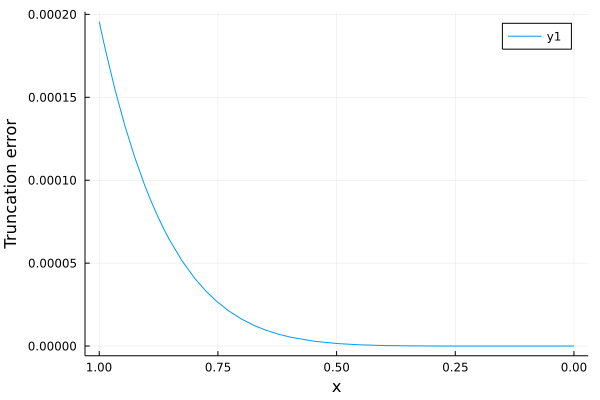

In [10]:
function truncation_error(x)
    #=
    ------------------------------------------
    Returns the truncarion error obtained when
    comparing the 7th order accurate 
    approximation of the sin x function and 
    the numpy.sin() function 
    ------------------------------------------
    Arguments:
    x : point at which the truncation error is
    calculated
    ------------------------------------------
    =#
    mysin = x - x^3/6 + x^5/120
    return abs(sin(x) - mysin)
end
    
using MTH229
using Plots

p = plot(truncation_error,0,1,xflip=true,xlabel="x",ylabel="Truncation error")
display(p)

In [11]:
#using PyPlot #plots con pyplot
#x= LinRange(0,10,100)
#p=plot(x,truncation_error.(x))
#display(p)

#### Estimación de la precisión de una serie truncada

Para estimar el orden de precisión de una aproximación truncada de una función, tomaremos un número en el rango $0<x<1$ y se calculará el error de truncamiento. Luego, se reducirá a la mitad el número elegido  y se calculará de nuevo el error de truncamiento. La razón entre los dos errores obtenidos da como resultado un factor de la forma $2^n$, donde $n$ es el orden de precisión de la aproximación.

In [12]:
# Randomly choosing the number in the range 0<x<1
x = rand()  
# Calculate the truncation errors and their ratio
te_x = truncation_error(x)
te_x2 = truncation_error(x/2)
ratio = te_x/te_x2 

# Results.
@printf("Para x = %.3f el valor del error de truncamiento es : %.g \n",x, te_x )
@printf("Para x = %.3f el valor del error de truncamiento es : %.g \n",x , te_x)
println("")
@printf("La razón de estos valores es %.3f \n", ratio)
@printf("Que es aproximadamente %.1f \n", log2(ratio))

Para x = 0.760 el valor del error de truncamiento es : 2.88793e-05 
Para x = 0.760 el valor del error de truncamiento es : 2.88793e-05 

La razón de estos valores es 127.233 
Que es aproximadamente 7.0 


---
### Estabilidad de un Algoritmo

Un algoritmo, ecuación o problema se denomina **inestable** o **mal-condicionado** si pequeños cambios en los datos de entrada produce grandes cambios en los datos de salida. 

Para ilustrar un algoritmo estable, considere la relación de recurrencia 

$x_0 = 1$\
$x_1 = \frac{1}{3}$\
$x_{n+1} = \frac{13}{3}x_n - \frac{4}{3} x_{n-1} $

que es equivalente a 

$x_n = \left( \frac{1}{3} \right)^n$.

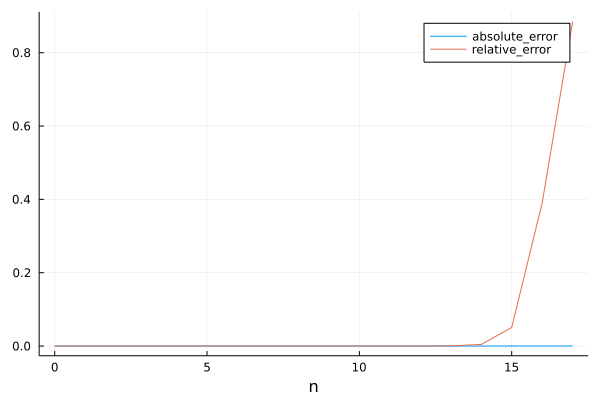

In [13]:
n = 18
X = zeros(n)
x = zeros(n)

X[1] = 1
X[2] = 1/3

x[1] = 1
x[2] = 1/3


for i in 3:n
    X[i] = 13*X[i-1]/3 - 4*X[i-2]/3
    x[i] = (1/3)^(i-1)
end

abs_error = abs.(X - x)
rel_error = abs.((X - x) ./X)
X = 0:n-1

plot(X, abs_error, label = "absolute_error",xlabel="n")
plot!(X, rel_error, label = "relative_error",xlabel="n")

Hasta el paso $n=15$ en la relación de recurrencia, el error absoluto es prácticamente cero, mientras que el error relativo crece a tan solo $0.05 = 5\%$. Esto muestra que el algoritmo es **estable**.

---
Por otra parte, la relación de recurrencia

$x_0 = 1$\
$x_1 = 4$\
$x_{n+1} = \frac{13}{3}x_n - \frac{4}{3} x_{n-1} $

comparada con  

$x_n = 4^n$,

muestra un comportamiento completamente diferente,

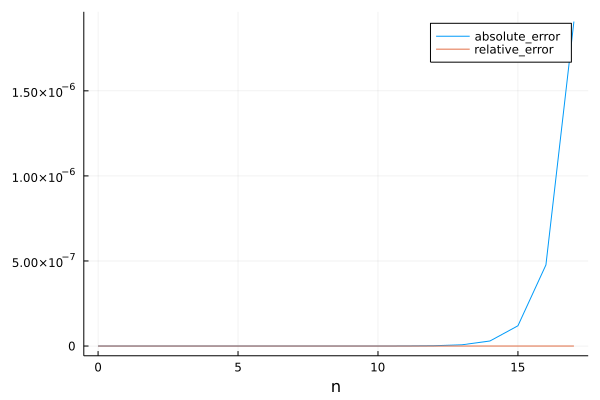

In [14]:
n = 18
X = zeros(n)
x = zeros(n)

X[1] = 1.0
X[2] = 4.0

x[1] = 1.0
x[2] = 4.0

for i in 3:n
    X[i] = 13*X[i-1]/3 - 4*X[i-2]/3
    x[i] = (4)^(i-1)
end

abs_error = abs.(X .- x)
rel_error = abs.((X .- x)./X)
X = 0:n-1

plot(X, abs_error, label = "absolute_error", xlabel="n")
plot!(X, rel_error, label = "relative_error", xlabel="n")

Nótese que, aproximadamente hasta el paso $n=20$, el error relativo es muy pequeño pero el error absoluto crece rápidamente. Se dice que el algoritmo es **inestable**.